In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt, cm as cm
from navgridviews.Raster import Raster as NavGridView, get_discrete_cmap

import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
trajectories = [[(1,1,1),(1,2,1),(1,3,1)], [(1,1,1),(2,2,1),(3,3,1)]]

## $\phi \in \mathcal{R}^{1}$
$\phi:$ Data to be displayed on grid view

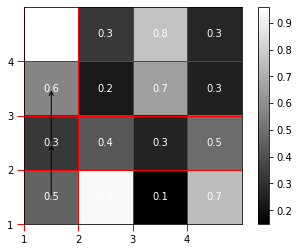

In [3]:
p = NavGridView(np.random.rand(4,4,1), coord_sys="cartesian").render(
    cmap=cm.gray).ticks().grid().add_text(fmt=".1f").add_trajectory([(1,1,1),(1,2,1),(1,3,1)])
plt.colorbar(p.im)

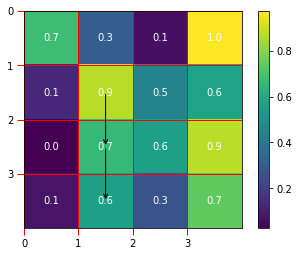

In [4]:
p = NavGridView(np.random.rand(4,4,1), coord_sys="rowcol").render(
    cmap=cm.viridis).ticks().grid().add_text(fmt=".1f").add_trajectory([(1,1,1),(1,2,1),(1,3,1)])
plt.colorbar(p.im)

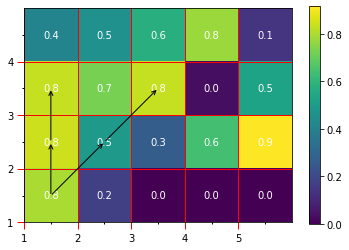

In [5]:
p = NavGridView(np.random.rand(17,1,1,1), coord_sys="cartesian").render(
    cmap=cm.viridis).ticks().grid().add_text(fmt=".1f").add_trajectories(trajectories)
plt.colorbar(p.im)

## $\phi \in \mathcal{R}^{2}$ 

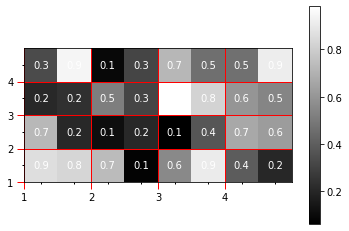

In [6]:
p = NavGridView(np.random.rand(4,4,1,2,1), coord_sys="cartesian").render(
    cmap=cm.gray).ticks().grid().add_text(fmt=".1f")
plt.colorbar(p.im)

## $\phi \in \mathcal{R}^{3}$ 

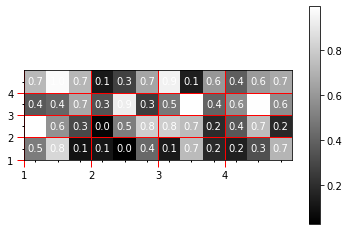

In [7]:
p = NavGridView(np.random.rand(4,4,1,3,1), coord_sys="cartesian").render(
    cmap=cm.gray).ticks().grid().add_text(fmt=".1f")
plt.colorbar(p.im)

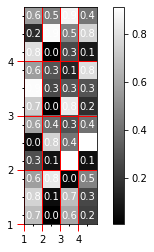

In [8]:
p = NavGridView(np.random.rand(4,4,3,1,1), coord_sys="cartesian").render(
    cmap=cm.gray).ticks().grid().add_text(fmt=".1f")
plt.colorbar(p.im)

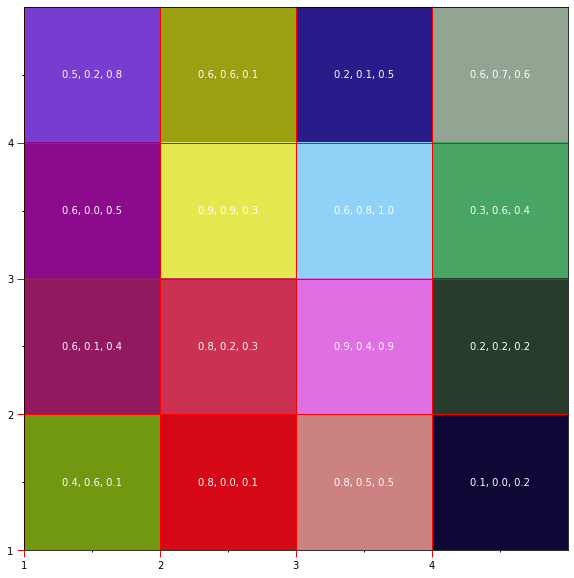

In [9]:
fig = plt.figure(figsize=(10,10))
NavGridView(np.random.rand(4,4,1,1,3), coord_sys="cartesian", ax=plt.gca()).render(
).ticks().grid().add_text(fmt=".1f")

## $\phi \in \mathcal{R}^{2} \times \mathcal{R}^{2}$ 

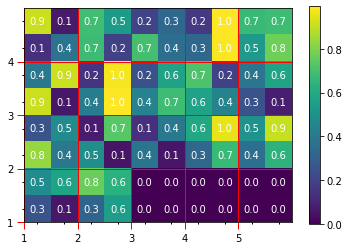

In [10]:
p = NavGridView(np.random.rand(17,2,2,1), coord_sys="cartesian").render().ticks().grid().add_text(fmt=".1f")
plt.colorbar(p.im)

## $\phi \in \mathcal{R}^{16} \times \mathcal{R}^{16}$ 

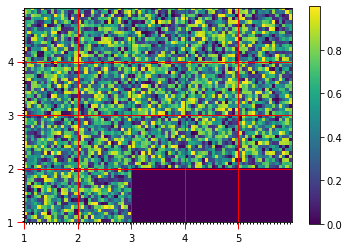

In [11]:
p = NavGridView(np.random.rand(17,16,16,1), coord_sys="cartesian").render().ticks().grid()
plt.colorbar(p.im)

## $\phi \in \mathcal{R}^{2} \times \mathcal{R}^{2} \times \mathcal{R}^{3}$ 

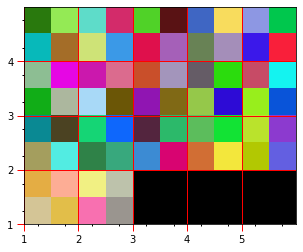

In [12]:
NavGridView(np.random.rand(17,2,2,3), coord_sys="cartesian").render().ticks().grid()

## $\phi \in \mathcal{R}^{16} \times \mathcal{R}^{16} \times \mathcal{R}^{3}$ 

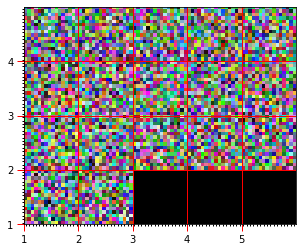

In [13]:
NavGridView(np.random.rand(17,16,16,3), coord_sys="cartesian").render().ticks().grid()

## $\phi \in \mathcal{R}^{64} \times \mathcal{R}^{64} \times \mathcal{R}^{3}$ 

CPU times: user 110 ms, sys: 5.99 ms, total: 116 ms
Wall time: 29.2 ms


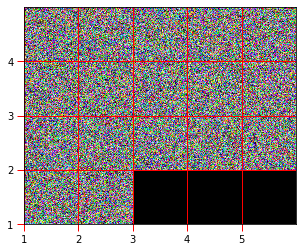

In [14]:
%%time
NavGridView(np.random.rand(17,64,64,3), coord_sys="cartesian").render().ticks(minor=False).grid()

## $\phi \in \mathcal{R}^{768} \times \mathcal{R}^{1024} \times \mathcal{R}^{3}$ 

CPU times: user 3.63 s, sys: 640 ms, total: 4.27 s
Wall time: 2.9 s


Text(0.5, 1.0, '')

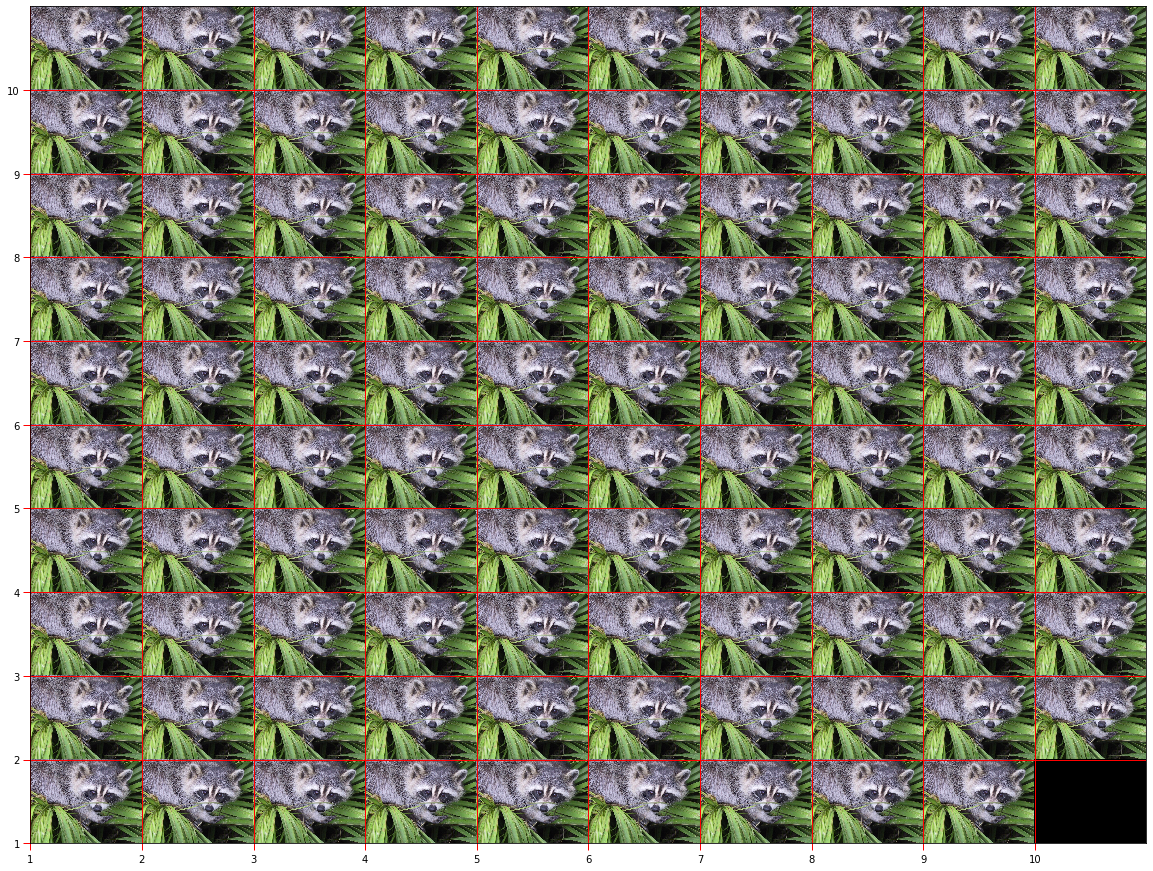

In [15]:
%%time
from scipy import misc
img = misc.face()
img_array = np.array([np.asarray(img)]*99)
fig = plt.figure(figsize=(20,20))
NavGridView(img_array, coord_sys="cartesian", ax=plt.gca()).render().ticks(minor=False).grid()
plt.title("")

CPU times: user 145 ms, sys: 1.88 ms, total: 147 ms
Wall time: 146 ms


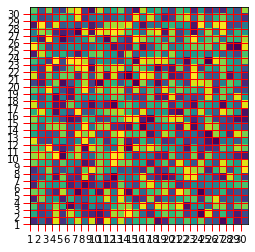

In [18]:
%%time
NavGridView(np.random.rand(30,30,1,1,1), coord_sys="cartesian").render().ticks(minor=False).grid()

## discrete $\phi$

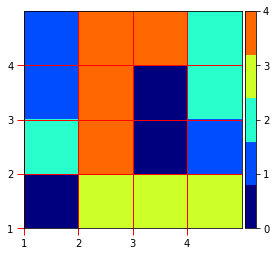

In [19]:
discrete_data = np.random.randint(0, 5, (4,4,1)).astype(np.uint8)
space = sorted(np.unique(discrete_data))
cmap = get_discrete_cmap(cm.jet, space)
p = NavGridView(discrete_data, coord_sys="cartesian").render(cmap=cmap).ticks().grid().colorbar(
    ticks = space
)

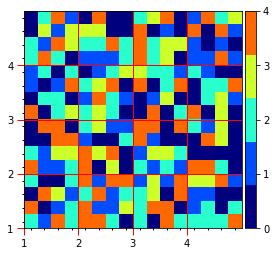

In [20]:
discrete_data = np.random.randint(0, 5, (4,4,4,4,1)).astype(np.uint8)
space = sorted(np.unique(discrete_data))
cmap = get_discrete_cmap(cm.jet, space)
p = NavGridView(discrete_data, coord_sys="cartesian").render(cmap=cmap).ticks().grid().colorbar(
    ticks = space
)